In [1]:
import time
import pymp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
cores = [i+1 for i in range(8)]
times = []

In [3]:
dataset = pd.read_csv('6_lakh(head).csv')
X= dataset.iloc[:,0:6]
y= dataset.iloc[:,6]

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X=np.array(X.head(5000))
y=np.array(y.head(5000))
X = sc.fit_transform(X)

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.8,stratify=y)

In [6]:
class KNN():
    def __init__(self):
        self.X_train = []
        self.y_train = []

    def euclidian(self,x1,x2):
        difference =  np.subtract(x1,x2)
        square_difference = np.power(difference,2)
        sum_square_difference = np.sum(square_difference)

        return sum_square_difference**(0.5)

    def fit(self,X,y):

        self.X_train = X
        self.y_train = y

    def predict(self,X_test,k=9):

        y_pred = []

        for i in range(X_test.shape[0]):
            distances = []
            for j in range(self.X_train.shape[0]):
                distances.append(self.euclidian(X_train[j],X_test[i]))

            indeces = np.argsort(np.array(distances))
            sol = 0
            threshold=0.5
            for K in range(k):

                sol += self.y_train[indeces[K]]
            if((sol/k)>=0.5):
                y_pred.append(1)
            else:
                y_pred.append(0)
        return y_pred

In [7]:
model = KNN()
model.fit(X_train,y_train.reshape(y_train.shape[0],))
def main(threads):
    with pymp.Parallel(num_threads=threads) as p:
        start = time.time()
        y_pred = [model.predict(i, 9) for i in p.iterate(X_test)]
        end = time.time()
    return end - start

In [8]:
time_taken = main(1)
times.append(time_taken)
print(time_taken)

232.75565385818481


In [16]:
time_taken = main(2)
times.append(time_taken)
print(time_taken)

201.57763814926147


In [17]:
time_taken = main(3)
times.append(time_taken)
print(time_taken)

99.40094470977783


In [18]:
time_taken = main(4)
times.append(time_taken)
print(time_taken)

73.26742887496948


In [19]:
time_taken = main(5)
times.append(time_taken)
print(time_taken)

71.46038269996643


In [20]:
time_taken = main(6)
times.append(time_taken)
print(time_taken)

70.11519408226013


In [21]:
time_taken = main(7)
times.append(time_taken)
print(time_taken)

69.26785349845886


In [22]:
time_taken = main(8)
times.append(time_taken)
print(time_taken)

69.5266842842102


In [10]:
times=[232.75565385818481,
      201.57763814926147,
      99.40094470977783,
      73.26742887496948,
      71.46038269996643,
      70.11519408226013,
      69.26785349845886,
      69.5266842842102
    ]
times

[232.75565385818481,
 201.57763814926147,
 99.40094470977783,
 73.26742887496948,
 71.46038269996643,
 70.11519408226013,
 69.26785349845886,
 69.5266842842102]

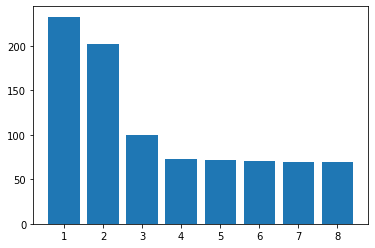

In [11]:
plt.bar(cores, times)
plt.show()